## 3-Sigma Technique (Standard Deviation)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import seaborn as sns

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Place your csv file inside this folder --> MyDrive/AI, Data Science & Analytics
data = pd.read_csv('raw_sales2.csv')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [20]:
def find_anomalies(data):
    
    anomalies = []

    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)

    anomaly_cut_off = random_data_std * 3

    lower_limit = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies


In [26]:
list_1 = find_anomalies(data['price'])
len(list_1)

461

In [ ]:
# see if the data is skewed or not

data.price.skew()

np.float64(4.312009366902367)

<Axes: xlabel='price', ylabel='Density'>

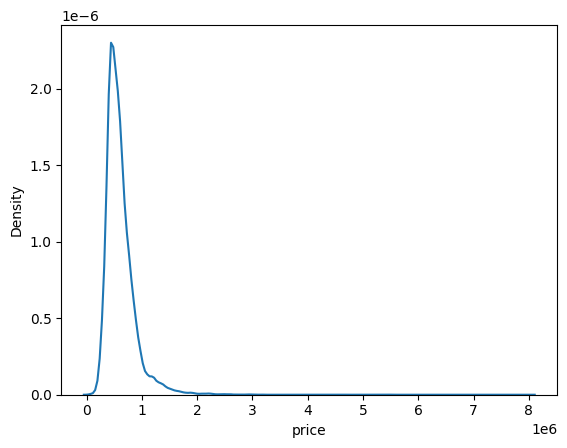

In [33]:
sns.kdeplot(data.price)

# yes it is skewed both numerically and visually

In [ ]:
# Fix the skew logarithmically

data['price_transformed'] = np.log(data.price)

data.price_transformed.skew()
# Way less than 4 which the previous one was, meaning very positively skewed

np.float64(0.47316462699847633)

<Axes: xlabel='price_transformed', ylabel='Density'>

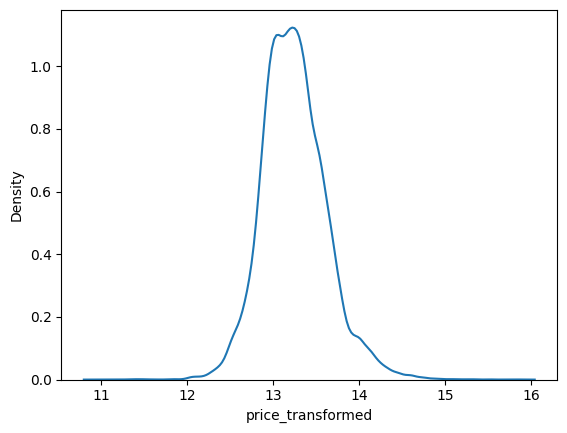

In [ ]:
sns.kdeplot(data.price_transformed)
# see, much less skewed now

In [ ]:
list_2 = find_anomalies(data.price_transformed)
len(list_1) # 461
len(list_2) # 266 = 195 less anomalies, or 0.9% 

# you can even double-unskew by running the log transfer on the already logaritimic trans


266

- Anything below 40, or above 80 are considered as outliers

## Boxplots

<Axes: >

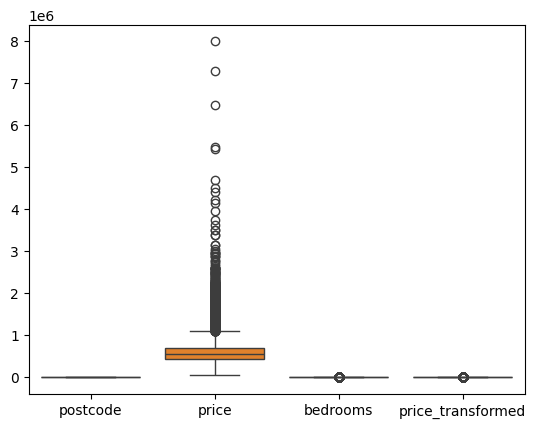

In [43]:
sns.boxplot(data=data)

The above code displays the plot below. 
- As you can see, it considers everything above 75 or below ~ -35 to be an outlier. The results are very close to method 1 above.

In [46]:
df = pd.DataFrame(data)
df

,datesold,postcode,price,propertyType,bedrooms,price_transformed
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328
...,...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3,13.122363
29576,2019-07-25 00:00:00,2612,560000,unit,2,13.235692
29577,2019-07-26 00:00:00,2912,464950,unit,2,13.049685
29578,2019-07-26 00:00:00,2601,589000,unit,2,13.286181


### Inter Quartile Range

#### IQR = Q3 - Q1

In [48]:
list1 = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]

In [ ]:
len(list1) # 25
max(list1) # 99
min(list1) # 43

43

In [ ]:
import statistics

statistics.mean(list1)

76.96

To find the 90th percentile for these (ordered) scores, start by multiplying 90 percent times the total number of scores, which gives 90% ∗ 25 = 0.90 ∗ 25 = 22.5 (the index). Rounding up to the nearest whole number, you get 23.

Hence, 98 is the 90th percentile for this dataset

Now say you want to find the 20th percentile. Start by taking 0.20 x 25 = 5 (the index); this is a whole number, which tells you the 20th percentile is the average of the 5th and 6th values in the ordered data set (62 and 66).

so, 20th percentile is 62+66/2 = 64

The median (the 50th percentile) for the test scores is the 13th score: 77.